In [109]:
#Some useful packages

import pandas as pd
import numpy as np
import operator
import matplotlib.pylab as plt

In [141]:
#Load data and data reduction and data cleaning

df = pd.read_csv('liquors.csv')
df.drop(['Store Location', 'Invoice/Item Number', 'Store Name', 'Address', 'City', 'Volume Sold (Gallons)', 'Zip Code'], axis=1, inplace=True)
df.drop(df.index[:10708015], inplace=True)
df.dropna(inplace=True)
df['State Bottle Retail'] = df['State Bottle Retail'].map(lambda x: x.lstrip('$'))
df['State Bottle Retail'] = df['State Bottle Retail'].map(lambda x: float(x))
df['Sale (Dollars)'] = df['Sale (Dollars)'].map(lambda x: x.lstrip('$'))
df['Sale (Dollars)'] = df['Sale (Dollars)'].map(lambda x: float(x))
df.head(10000)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
10708015,01/03/2017,4312,78.0,POTTAWATTA,1012200.0,Scotch Whiskies,55.0,SAZERAC NORTH AMERICA,8208,House Of Stuart,6,1750,$10.52,15.78,3,15.78,5.25
10708016,01/03/2017,4312,78.0,POTTAWATTA,1042100.0,Imported Dry Gins,35.0,BACARDI USA INC,28206,Bombay Dry Gin,12,750,$10.50,15.75,1,189.00,0.75
10708017,01/03/2017,4312,78.0,POTTAWATTA,1082000.0,Imported Cordials & Liqueurs,259.0,Heaven Hill Brands,65195,Hpnotiq,6,750,$9.83,14.75,1,88.50,0.75
10708018,01/03/2017,4312,78.0,POTTAWATTA,1081200.0,Cream Liqueurs,260.0,DIAGEO AMERICAS,68037,Bailey's Original Irish Cream,12,1000,$16.50,24.75,2,297.00,2.00
10708019,01/03/2017,4312,78.0,POTTAWATTA,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10627,Canadian Club Whisky,12,1000,$9.71,14.57,1,174.84,1.00
10708020,01/03/2017,4312,78.0,POTTAWATTA,1062200.0,White Rum,55.0,SAZERAC NORTH AMERICA,44217,Barton Rum Light,12,1000,$4.00,6.00,1,72.00,1.00
10708021,01/03/2017,4312,78.0,POTTAWATTA,1062400.0,Spiced Rum,260.0,DIAGEO AMERICAS,43338,Captain Morgan Spiced Rum,6,1750,$18.00,27.00,2,162.00,3.50
10708022,01/03/2017,4312,78.0,POTTAWATTA,1031000.0,American Vodka,55.0,SAZERAC NORTH AMERICA,35318,Barton Vodka,6,1750,$6.92,10.38,5,62.28,8.75
10708023,01/03/2017,4312,78.0,POTTAWATTA,1032200.0,Imported Flavored Vodka,370.0,PERNOD RICARD USA,34051,Absolut Raspberri,12,1000,$14.99,22.49,1,269.88,1.00
10708024,01/03/2017,4312,78.0,POTTAWATTA,1032000.0,Imported Vodka,370.0,PERNOD RICARD USA,34007,Absolut Swedish Vodka 80 Prf,12,1000,$14.99,22.49,3,269.88,3.00


In [150]:
df['Date'] = pd.to_datetime(df['Date'])

In [166]:
df.head()

,Date,Store Number,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
10708015,2017-01-03,4312,78.0,POTTAWATTA,1012200.0,Scotch Whiskies,55.0,SAZERAC NORTH AMERICA,8208,House Of Stuart,6,1750,$10.52,15.78,3,15.78,5.25
10708016,2017-01-03,4312,78.0,POTTAWATTA,1042100.0,Imported Dry Gins,35.0,BACARDI USA INC,28206,Bombay Dry Gin,12,750,$10.50,15.75,1,189.00,0.75
10708017,2017-01-03,4312,78.0,POTTAWATTA,1082000.0,Imported Cordials & Liqueurs,259.0,Heaven Hill Brands,65195,Hpnotiq,6,750,$9.83,14.75,1,88.50,0.75
10708018,2017-01-03,4312,78.0,POTTAWATTA,1081200.0,Cream Liqueurs,260.0,DIAGEO AMERICAS,68037,Bailey's Original Irish Cream,12,1000,$16.50,24.75,2,297.00,2.00
10708019,2017-01-03,4312,78.0,POTTAWATTA,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10627,Canadian Club Whisky,12,1000,$9.71,14.57,1,174.84,1.00


In [167]:
month = {}
month2 = {}

for i, r in df.iterrows():
    m = r['Date'].month
    s = r['Sale (Dollars)']
    v = r['Volume Sold (Liters)']
    if m in month:
        month[m] += s
    else:
        month[m] = s
    if m in month2:
        month2[m] += v
    else:
        month2[m] = v

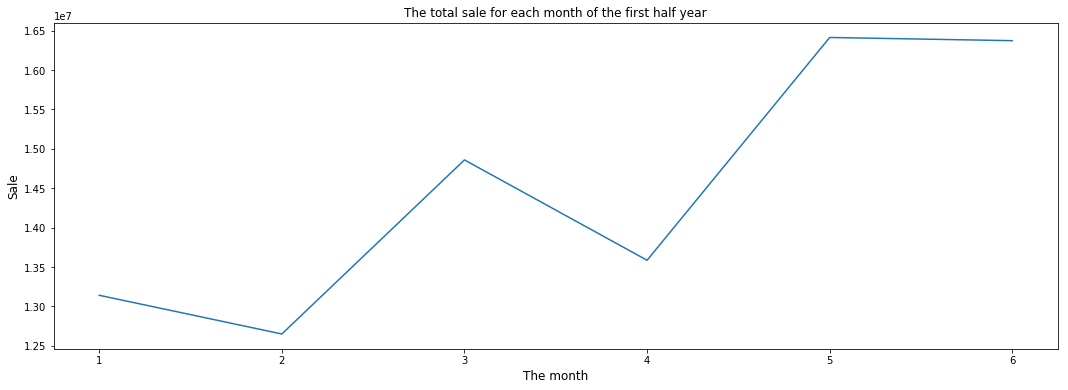

In [191]:
x = list(month.keys())[:6]
y = list(month.values())[:6]
plt.figure(figsize=(18,6))
plt.plot(x, y)
plt.xlabel('The month', fontsize=12)
plt.ylabel('Sale', fontsize=12)
plt.title('The total sale for each month of the first half year', fontsize=12)
plt.show()

In [122]:
# Navie Bayes Classifier, part one: Scan data set:

sale_category = {}
sale_item = {}
category_item = {}
category_volume = {}
csv = {}
sv = {}


for i, r in df.iterrows():
    
    category = r['Category']
    item = r['Item Number']
    price = r['State Bottle Retail']
    volume = r['Volume Sold (Liters)']
    store = r['Store Number']
    vendor = r['Vendor Number']
    bottle = r['Bottles Sold']
    sale = r['Sale (Dollars)']
    
    if category in sale_category:
        sale_category[category] += sale
    else:
        sale_category[category] = sale
        
    if item in sale_item:
        sale_item[item] += sale
    else:
        sale_item[item] = sale
        
    if category in category_item:
        if item in category_item[category]:
            category_item[category][item] += volume
        else:
            category_item[category][item] = volume
    else:
        category_item[category] = {}
        category_item[category][item] = volume
    
    if category in category_volume:
        category_volume[category] += volume
    else:
        category_volume[category] = volume
        
    if (category, store, vendor) in csv:
        csv[(category, store, vendor)] += 1
    else:
        csv[(category, store, vendor)] = 1
        
    if (store, vendor) in sv:
        sv[(store, vendor)] += 1
    else:
        sv[(store, vendor)] = 1

In [123]:
county_sale = {}
county_pop = {}
county_vendorV = {}
county_vendorR = {}
vendor_county = {}


for i, r in df.iterrows():
    
    county = r['County Number']
    v = r['Volume Sold (Liters)']
    p = r['State Bottle Retail']
    vendor = r['Vendor Number']
    b = r['Bottles Sold']
    category = r['Category']
    sale = r['Sale (Dollars)']
    
    if county in county_sale:
        if category in county_sale[county]:
            county_sale[county][category] += sale
        else:
            county_sale[county][category] = sale
    else:
        county_sale[county] = {}
        county_sale[county][category] = sale
    
    if county in county_pop:
        if category in county_pop[county]:
            county_pop[county][category] += v
        else:
            county_pop[county][category] = v
    else:
        county_pop[county] = {}
        county_pop[county][category] = v
    
    if county in county_vendorV:
        if vendor in county_vendorV[county]:
            county_vendorV[county][vendor] += v
        else:
            county_vendorV[county][vendor] = v
    else:
        county_vendorV[county] = {}
        county_vendorV[county][vendor] = v
    
    if county in county_vendorR:
        if vendor in county_vendorR[county]:
            county_vendorR[county][vendor] += sale
        else:
            county_vendorR[county][vendor] = sale
    else:
        county_vendorR[county] = {}
        county_vendorR[county][vendor] = sale
    
    if vendor in vendor_county:
        if county in vendor_county[vendor]:
            vendor_county[vendor][county] += sale
        else:
            vendor_county[vendor][county] = sale
    else:
        vendor_county[vendor] = {}
        vendor_county[vendor][county] = sale

In [124]:
def bayes_model(store, vendor):
    P = {}
    for key, value in csv.items():
        c, s, v = key
        if s==store and v==vendor:
            P[c] = value/sv[s,v]
    if (len(P)):
        return max(P, key=P.get)
    return None

def vendor_sale_county(vendor):
    return max(vendor_county[vendor], key=vendor_county[vendor].get)

def county_revenue(county):
    return max(county_sale[county], key=county_sale[county].get)

def county_vendorv(county):
    return max(county_vendorV[county], key=county_vendorV[county].get)

def county_vendorr(county):
    return max(county_vendorR[county], key=county_vendorR[county].get)

def county_p(county):
    return max(county_pop[county], key=county_pop[county].get)

In [125]:
sorted_Csale = sorted(sale_category.items(), key=operator.itemgetter(1))
sorted_Isale = sorted(sale_item.items(), key=operator.itemgetter(1))
sorted_Cvolume = sorted(category_volume.items(), key=operator.itemgetter(1))

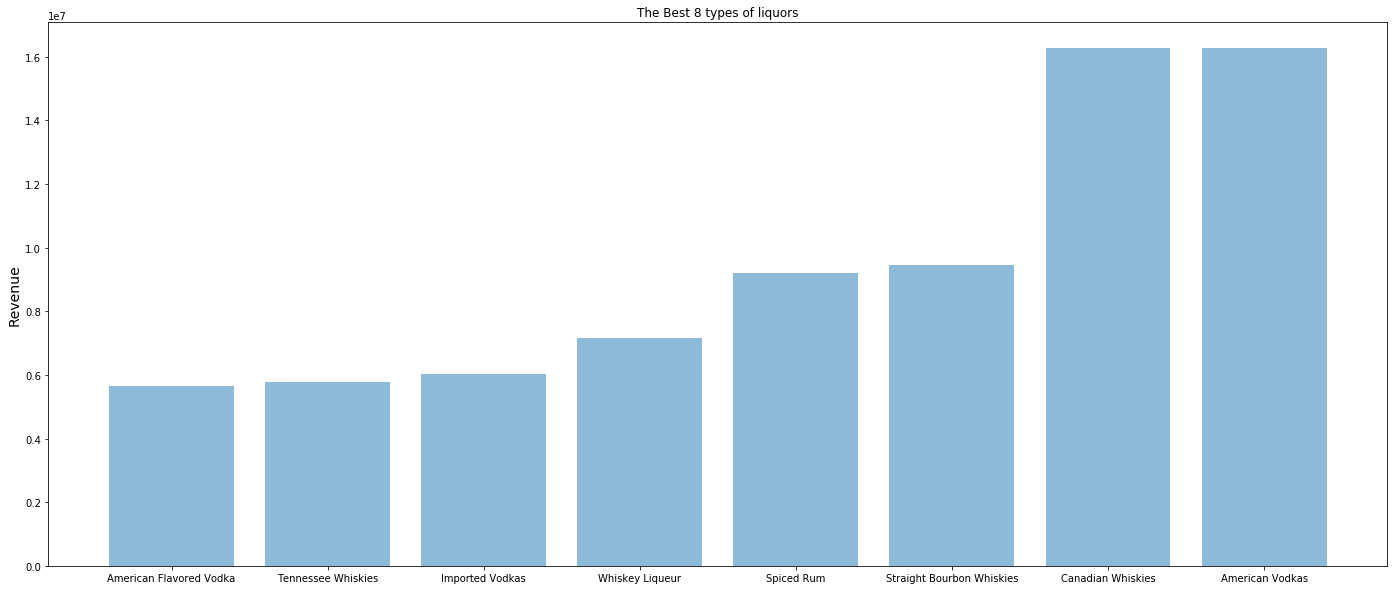

In [126]:
# Data visulization for category sale

x1, y1 = map(list, zip(*sorted_Csale))
csale6 = y1[len(y1)-8:]
numbers = x1[len(x1)-8:]
objects1 = []
for number in numbers:
    objects1.append(list(df.loc[df['Category'] == number, 'Category Name'])[0])
y_pos = np.arange(len(objects1))
plt.figure(figsize=(24, 10))
plt.bar(y_pos, csale6, align='center', alpha=0.5)
plt.xticks(y_pos, objects1)
plt.ylabel('Revenue', fontsize=14)
plt.title('The Best 8 types of liquors')
plt.show()

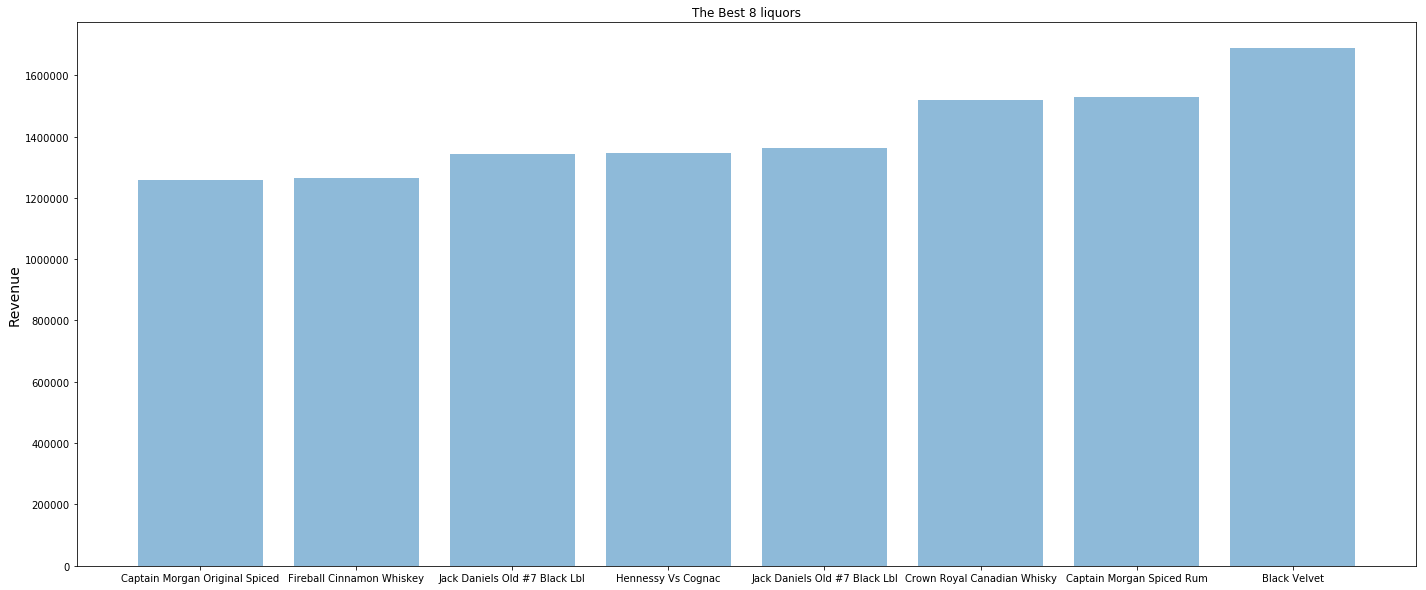

In [127]:
# Data visulization for item sales

x2, y2 = map(list, zip(*sorted_Isale))
isale6 = y2[len(y2)-8:]
numbers2 = x2[len(x2)-8:]
objects2 = []
for number in numbers2:
    objects2.append(list(df.loc[df['Item Number'] == number, 'Item Description'])[0])
y_pos = np.arange(len(objects2))
plt.figure(figsize=(24, 10))
plt.bar(y_pos,isale6, align='center', alpha=0.5)
plt.xticks(y_pos, objects2)
plt.ylabel('Revenue', fontsize=14)
plt.title('The Best 8 liquors')
plt.show()

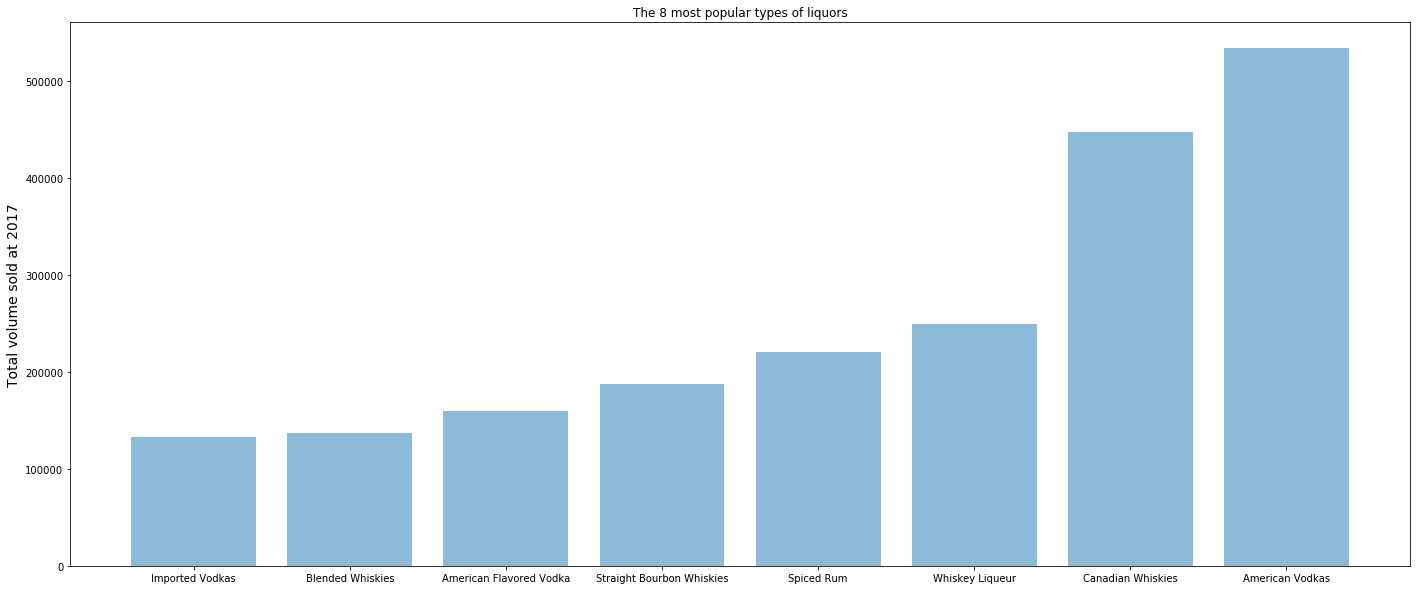

In [128]:
#Data Visulization for popular types of liquor

x3, y3 = map(list, zip(*sorted_Cvolume))
cvolume6 = y3[len(y3)-8:]
numbers3 = x3[len(x3)-8:]
objects3 = []
for number in numbers3:
    objects3.append(list(df.loc[df['Category'] == number, 'Category Name'])[0])
y_pos = np.arange(len(objects3))
plt.figure(figsize=(24, 10))
plt.bar(y_pos,cvolume6, align='center', alpha=0.5)
plt.xticks(y_pos, objects3)
plt.ylabel('Total volume sold at 2017', fontsize=14)
plt.title('The 8 most popular types of liquors')
plt.show()

In [129]:
def best8_counties(vendor_number):
    sorted_v = sorted(vendor_county[vendor_number].items(), key=operator.itemgetter(1))
    x, y = map(list, zip(*sorted_v))
    c8 = y[len(y)-8:]
    numbers = x[len(x)-8:]
    objects = []
    for number in numbers:
        objects.append(list(df.loc[df['County Number'] == number, 'County'])[0])
    y_pos = np.arange(len(objects))
    plt.figure(figsize=(24, 8))
    plt.bar(y_pos, c8, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Revenue', fontsize=14)
    title = 'The 8 counties that like vendor ' + list(df.loc[df['Vendor Number'] == vendor_number, 'Vendor Name'])[0]
    plt.title(title)
    plt.show()

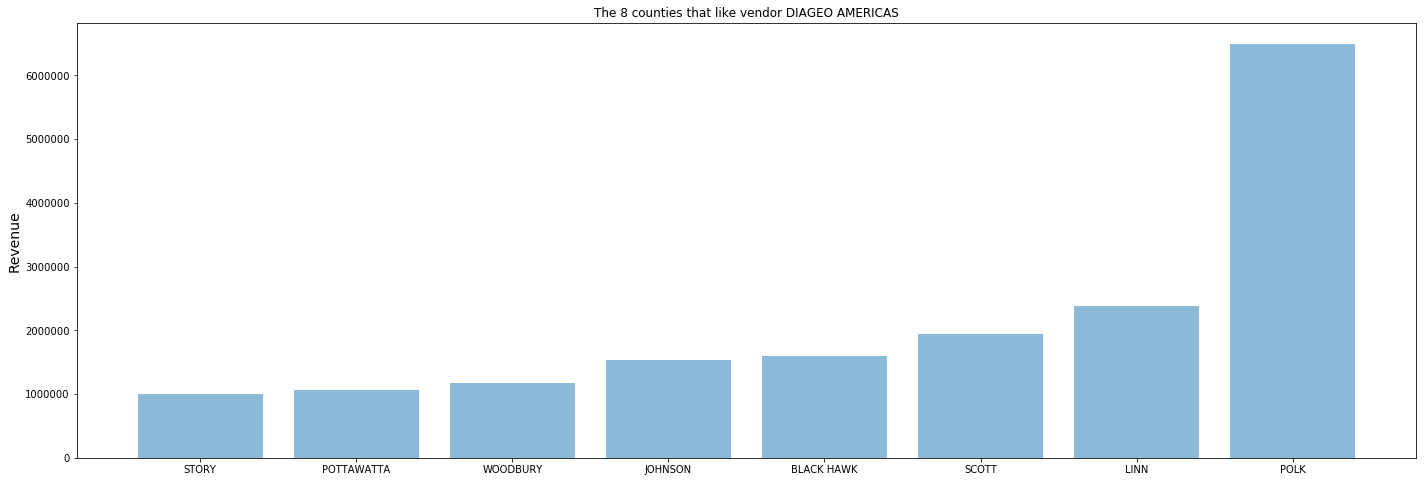

In [130]:
best8_counties(260)

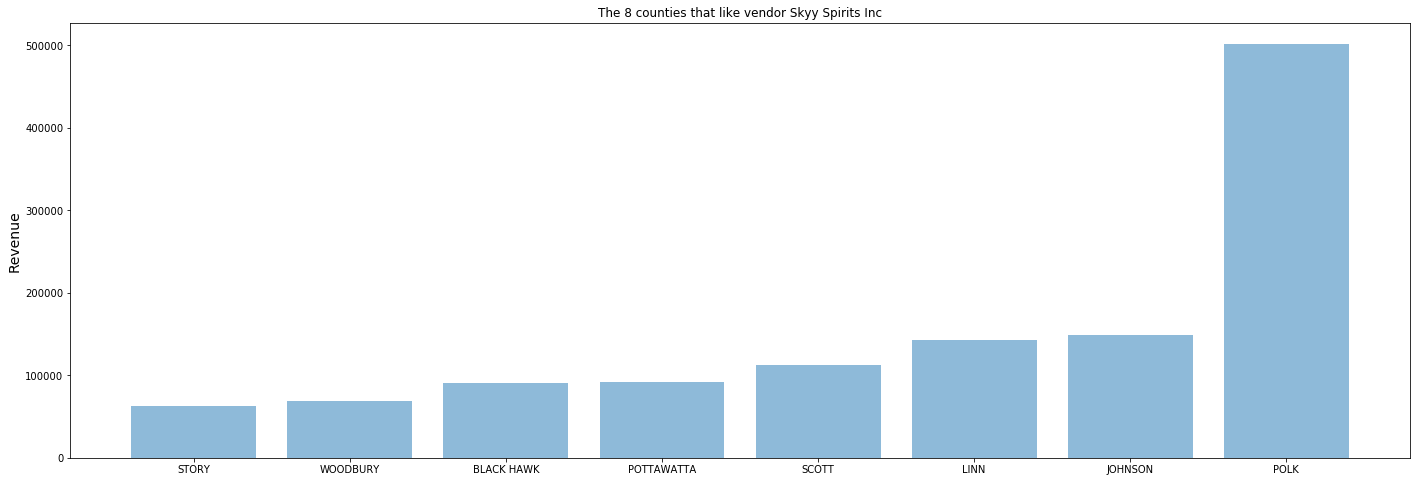

In [145]:
best8_counties(461)

In [131]:
# Bayesian Reasoning:

cates = {}

for i, r in df.iterrows():
    
    cate = r['Category']
    if cate in cates:
        cates[cate] += 1
    else:
        cates[cate] = 1

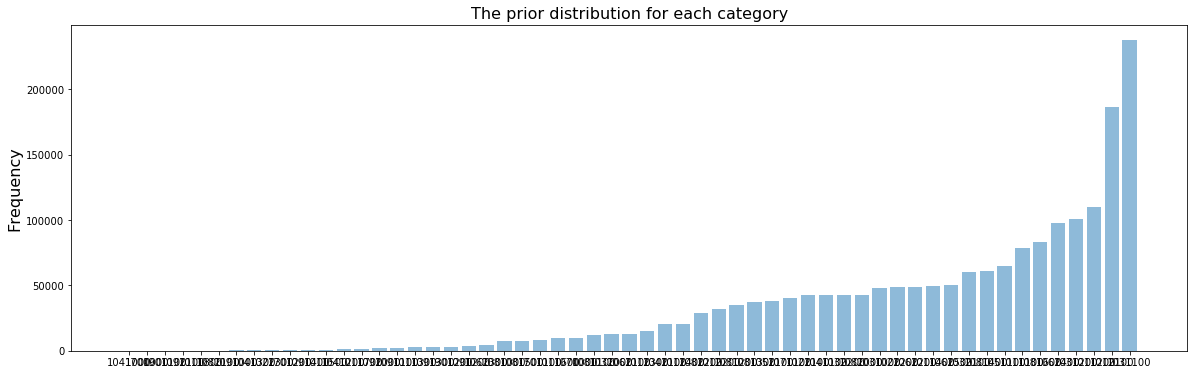

In [132]:
sorted_cates = sorted(cates.items(), key=operator.itemgetter(1))
x5, y5 = map(list, zip(*sorted_cates))
for i in range(len(x5)):
    x5[i] = int(x5[i])
plt.rcParams.update({'font.size': 10})
y_pos = np.arange(len(x5))
plt.figure(figsize=(20, 6))
plt.bar(y_pos, y5, align='center', alpha=0.5)
plt.xticks(y_pos, x5)
plt.ylabel('Frequency', fontsize=16)
plt.title('The prior distribution for each category', fontsize=16)
plt.show()

In [133]:
def bayes_reasoning(store, vendor):
    P = {}
    for key, value in csv.items():
        c, s, v = key
        if s==store and v==vendor:
            P[c] = value/sv[s,v]
    return P

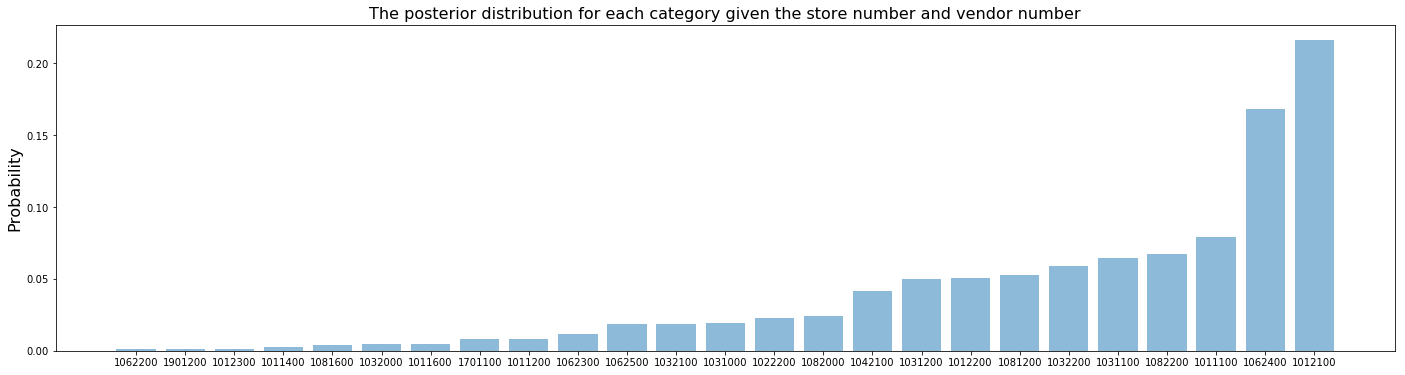

In [134]:
posterior = bayes_reasoning(4312, 260)

update = sorted(posterior.items(), key=operator.itemgetter(1))
x6, y6 = map(list, zip(*update))
for i in range(len(x6)):
    x6[i] = int(x6[i])
y_pos = np.arange(len(x6))
plt.figure(figsize=(24, 6))
plt.bar(y_pos, y6, align='center', alpha=0.5)
plt.xticks(y_pos, x6)
plt.ylabel('Probability', fontsize=16)
plt.title('The posterior distribution for each category given the store number and vendor number', fontsize=16)
plt.show()

In [135]:
county_cates = {}
county_consumes = {}

for i, r in df.iterrows():
    
    cate = r['Category']
    v = r['Volume Sold (Liters)']
    county = r['County Number']
    
    if county in county_consumes:
        county_consumes[county] += v
    else:
        county_consumes[county] = v
        
    if county in county_cates:
        if cate in county_cates[county]:
            county_cates[county][cate] += v
        else:
            county_cates[county][cate] = v
            
    else:
        county_cates[county] = {}
        county_cates[county][cate] = v

In [136]:
def best_cate_county(CN):
    
    sorted_c = sorted(county_cates[CN].items(), key=operator.itemgetter(1))
    x, y = map(list, zip(*sorted_c))
    c6 = y[len(y)-8:]
    numbers = x[len(x)-8:]
    objects = []
    for number in numbers:
        objects.append(list(df.loc[df['Category'] == number, 'Category Name'])[0])
    y_pos = np.arange(len(objects))
    plt.figure(figsize=(24, 8))
    plt.bar(y_pos, c6, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Total volume consumed at 2017', fontsize=14)
    title = 'The 8 most popular types of liquors at county ' + list(df.loc[df['County Number'] == CN, 'County'])[0]
    plt.title(title)
    plt.show()

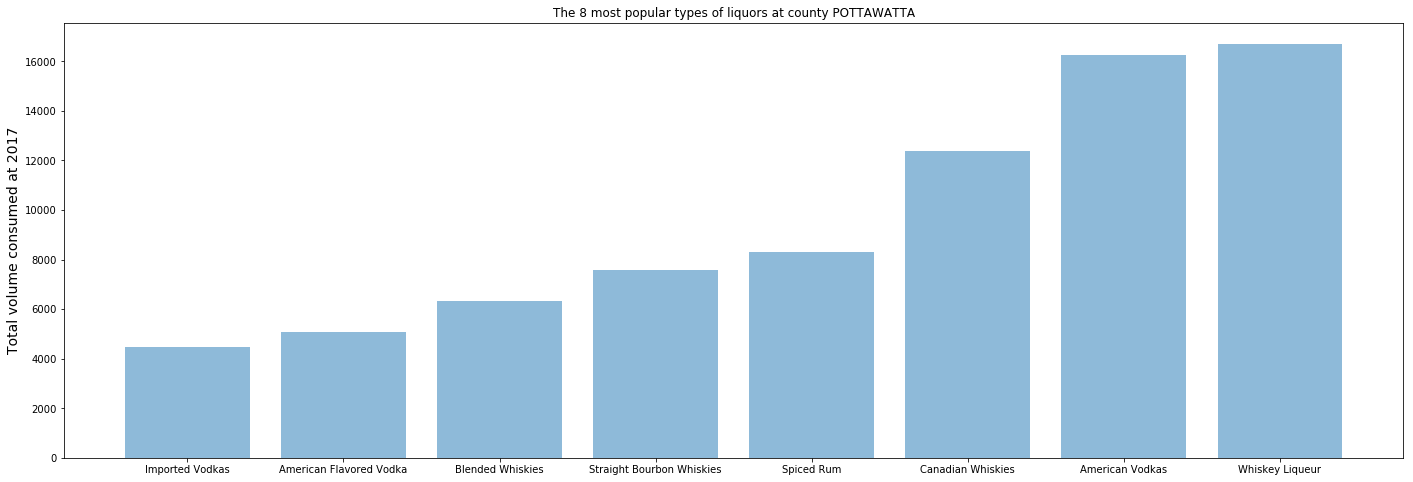

In [137]:
best_cate_county(78)

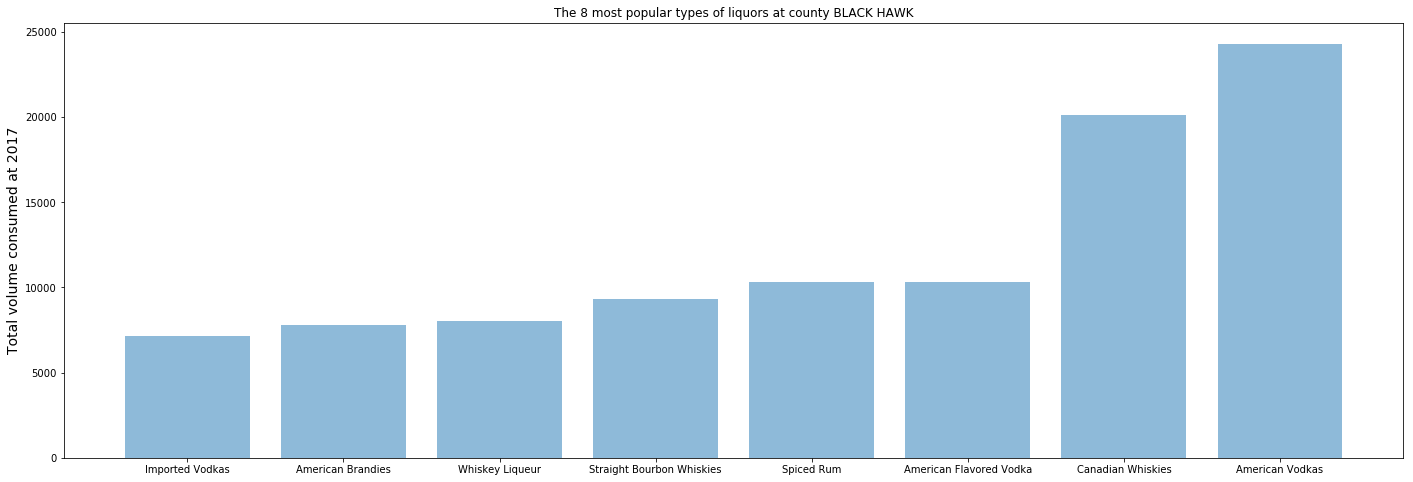

In [149]:
best_cate_county(7)

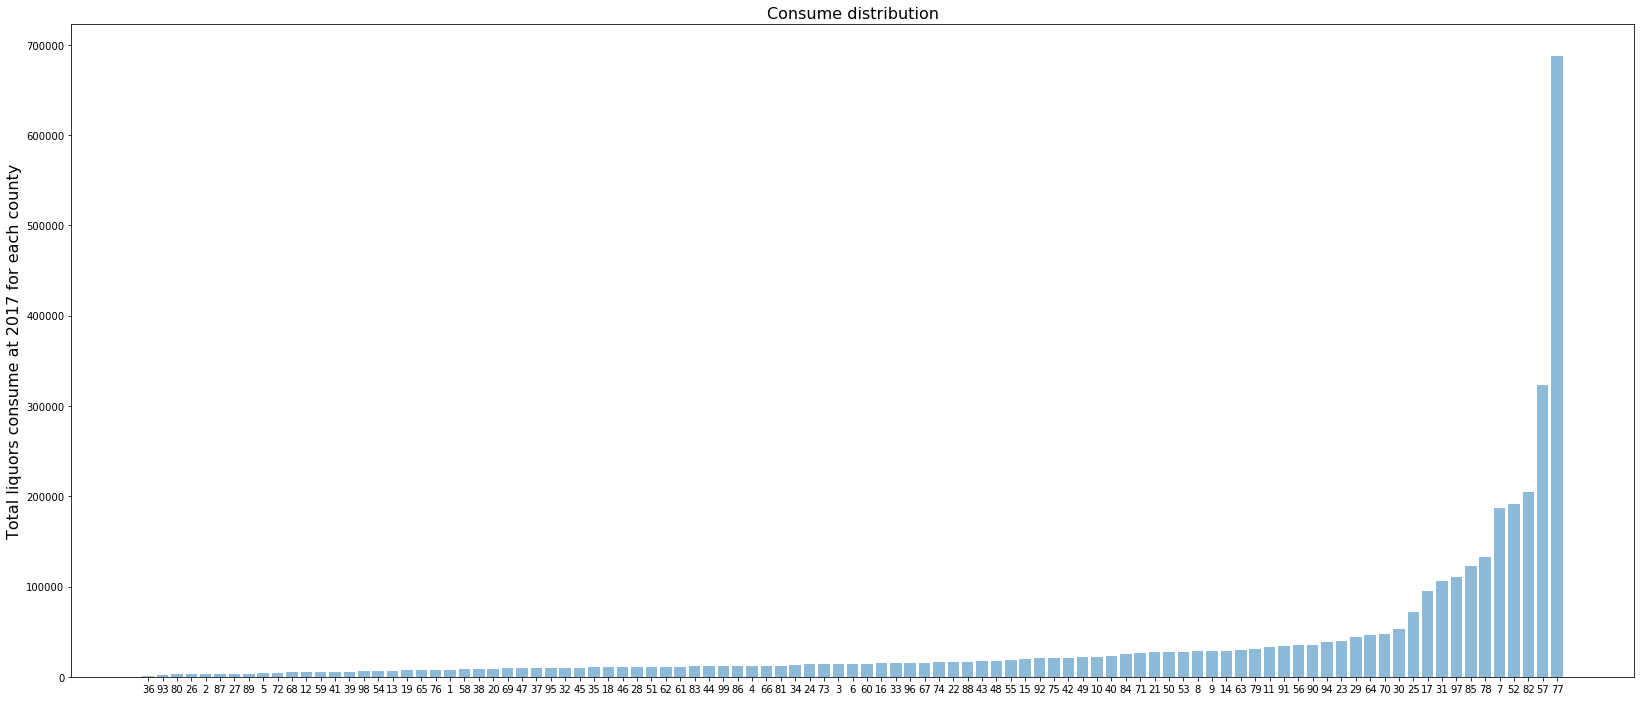

In [138]:
sorted_con = sorted(county_consumes.items(), key=operator.itemgetter(1))
x7, y7 = map(list, zip(*sorted_con))
for i in range(len(x7)):
    x7[i] = int(x7[i])
y_pos = np.arange(len(x7))
plt.figure(figsize=(28, 12))
plt.bar(y_pos, y7, align='center', alpha=0.5)
plt.xticks(y_pos, x7)
plt.ylabel('Total liquors consume at 2017 for each county', fontsize=16)
plt.title('Consume distribution', fontsize=16)
plt.show()